In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [23]:
marginList = [0.07,0.15,0.3]
epsilons = [0.0, 8/255, 16/255, 36/255, 0.3, 0.5, 0.6, 0.8, 1.0]
index_keep = [0,2,3,4,5,-1]

In [26]:
# Results for the ResNet experiment 

res = np.array([[0.89648438, 0.8828125 , 0.87011719, 0.81640625, 0.66992188,
        0.4609375 , 0.37304688, 0.20605469, 0.11425781],
       [0.90332031, 0.87988281, 0.85644531, 0.79003906, 0.64160156,
        0.42382812, 0.328125  , 0.16796875, 0.07324219],
       [0.90820312, 0.88769531, 0.85839844, 0.79492188, 0.61816406,
        0.39941406, 0.28710938, 0.12695312, 0.03808594]])
rob_accuracy_Baseline = res[:,index_keep]

## Comparison with all layers constrained but the final projection layer

In [27]:
rob_accuracy_allConstrained = np.loadtxt("robustnessAllConstrained.txt").reshape(len(marginList),len(epsilons))

In [28]:
epsilons = np.array(epsilons)[index_keep]

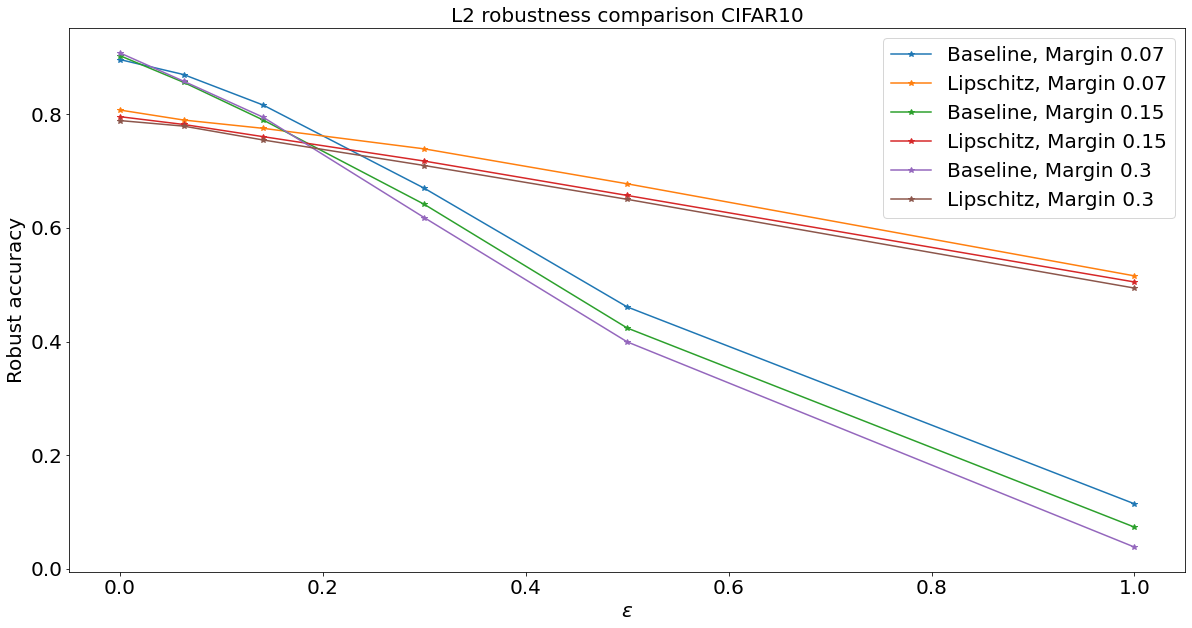

In [31]:
fig = plt.figure(figsize=(20,10))


## Plot constrained networks
for i in range(len(marginList)):
    
    plt.plot(epsilons,rob_accuracy_Baseline[i],'-*',label=f"Baseline, Margin {np.round(marginList[i],2)}")
    plt.plot(epsilons,rob_accuracy_allConstrained[i,index_keep],'-*',label=f"Lipschitz, Margin {np.round(marginList[i],2)}")

plt.xlabel(r"$\varepsilon$",fontsize=20)
plt.ylabel("Robust accuracy",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20,loc=1)

plt.title(f"L2 robustness comparison CIFAR10",fontsize=20);
plt.show()